In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

## BEM solution

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:66(Total) 64(Edge) 0(Trace)
[Mesh] Number of Nodes:194(Total) 192(Edge) 0(Trace) 2(Source)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(4, 1), (5, -1)]


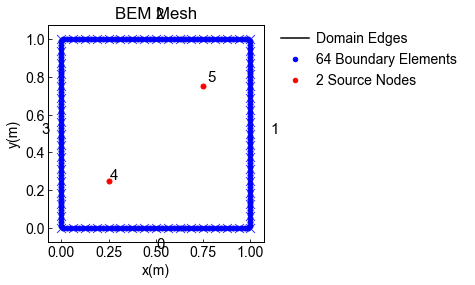

In [3]:
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh-#Anti-clock wise for internal domain
Boundary_vert=[(0.0, 0.0), (1.0, 0.0),(1.0,1.0),(0.0,1.0)] 
Source_vert=[(0.25,0.25),(0.75,0.75)]

element_esize=1.0/16#Edge mesh is important to overall mass balance

BEM_Case1.set_Mesh(Boundary_vert,[],Source_vert,element_esize,[],Type="Quad")

#2.Set Boundary condition
bc_sources=[(4,1),(5,-1)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc_sources,update=1)


#3.Set Domain Properties - permeability tensor
BEM_Case1.SetProps(k=10,miu=2)

#Check Mesh
BEM_Case1.plot_Mesh()
#Check Node,BC if necessary
#BEM_Case1.Mesh.print_debug()

[Solution] #DOFs= 194
[Visulization] Plotting Solution


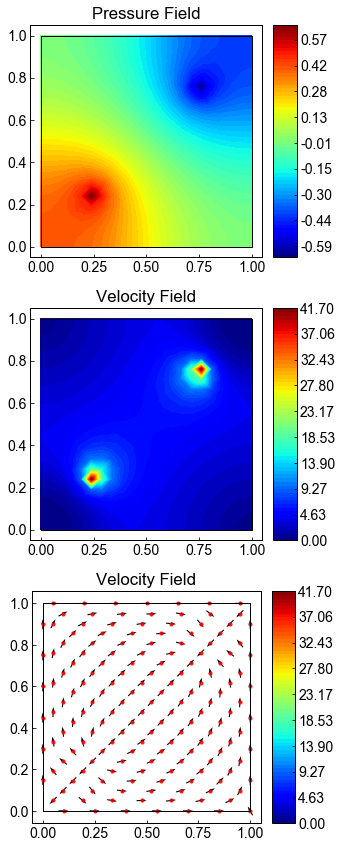

In [4]:
puv=BEM_Case1.Solve()
xx=BEM_Case1.PostProcess.plot_Solution()
#BEM_Case1.PostProcess.print_Solution()

In [5]:
BEM_Case1.get_Solution((0.25+1e-3,0.25))

(0.9995790140879743, 667.1473849865707, 2.1049279264356304)

In [6]:
BEM_Case1.get_Solution((0.5,0.5))

(3.3584246494910985e-15, 3.831725665743906, 3.8317256657439067)

## Solution Verification

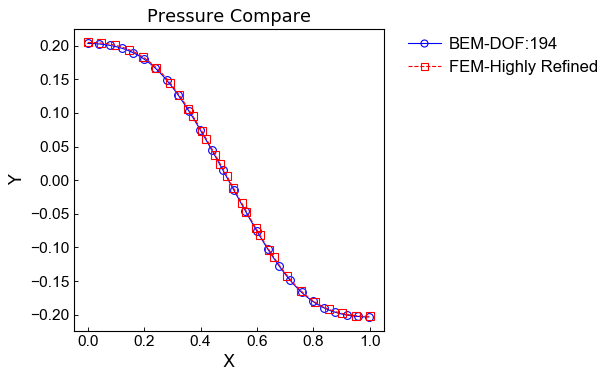

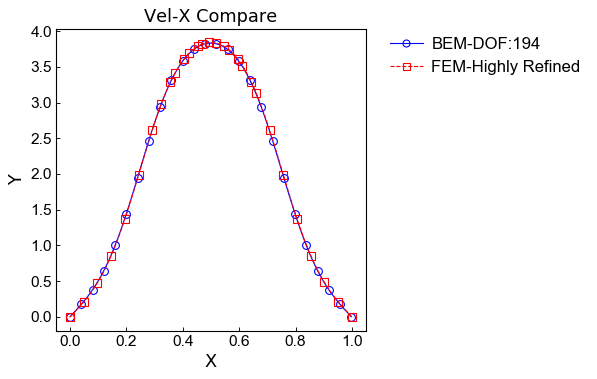

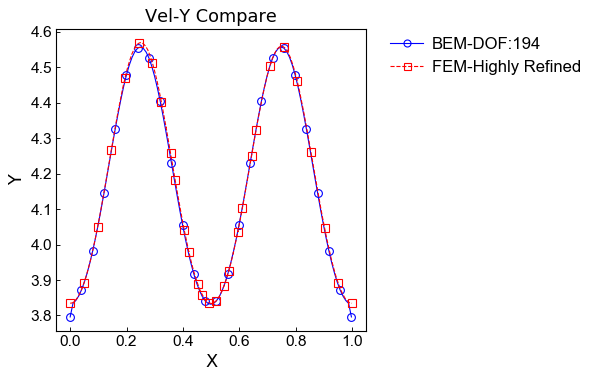

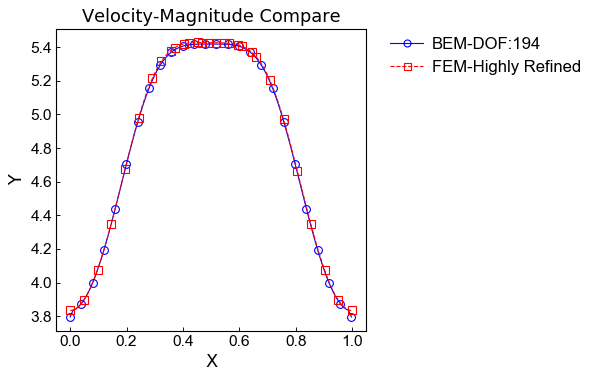

In [7]:
import numpy as np
tol=1e-3
Pts1,Pts2=(0.0+tol,0.5),(1.0-tol,0.5)

#BEM Solution
PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
np.savetxt(".\\Verification\\SimpleSources_PUV.csv", PUV, delimiter=",")

#Get Comsol Data
P_ref = np.genfromtxt('.\\Verification\\SimpleSources_p.csv', comments='%',delimiter=',')
u_ref = np.genfromtxt('.\\Verification\\SimpleSources_u.csv', comments='%',delimiter=',')
v_ref = np.genfromtxt('.\\Verification\\SimpleSources_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:%d'%(BEM_Case1.Mesh.Ndof),'FEM-Highly Refined']
DataSetX=[PUV[:,0],P_ref[:,0]]

DataSetY=[PUV[:,1],P_ref[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV[:,2],u_ref[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Vel-X Compare')

DataSetY=[PUV[:,3],v_ref[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Vel-Y Compare')

UMag_FEM_ref=np.sqrt(u_ref[:,1]*u_ref[:,1]+v_ref[:,1]*v_ref[:,1])
UMag_BEM=np.sqrt(PUV[:,2]*PUV[:,2]+PUV[:,3]*PUV[:,3])
DataSetY=[UMag_BEM,UMag_FEM_ref]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Magnitude Compare')